In [1]:
import numpy as np

In [2]:
data = {i:np.random.randn() for i in range(7)}
print (data)

{0: 0.5999887761219334, 1: 1.7010730239681733, 2: -1.2834376106242045, 3: 0.48676077742617874, 4: -0.9428832121930095, 5: -0.6752272815669494, 6: 0.19089547490823947}


In [3]:
data[2]

-0.639585544601053

In [4]:
data?#内省显示通用属性

SyntaxError: invalid syntax (<ipython-input-4-82859badaafb>, line 1)

In [5]:
np.*load*?#显示所有该通配符的匹配名字

SyntaxError: invalid syntax (<ipython-input-5-cadbc9295ba8>, line 1)

### 利用run执行

In [6]:
def f(x,y,z):
    return (x+y)/z
a = 5
b = 6
c = 7.5

result = f(a,b,c)

In [7]:
%run ipython_script_test.py #调用python文件，如果python脚本需要命令行参数，可以放在文件路径后面！

1.4666666666666666


In [8]:
%quickref #浏览命令

In [9]:
#测试时间
strings = ['foo','foobar','baz','qux','python','Guido Van Rossum'] * 100000

%timeit method1 = [x for x in strings if x.startswith('foo')]

%timeit method2 = [x for x in strings if x[:3] == 'foo']
    

87.1 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
61.9 ms ± 824 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
#创建ndarray
arr1 = np.array([6,7.5,8,0,1])

In [11]:
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [12]:
#嵌套序列
arr2 = np.array([[1,2,3,4],[5,6,7,8]])

In [13]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [14]:
arr1.dtype

dtype('float64')

In [15]:
arr2.dtype

dtype('int64')

In [16]:
#用0初始化
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [17]:
np.zeros((3,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [18]:
np.zeros((2,3,2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [19]:
np.empty((2,3,2))#空值，直接读取未初始化的值

array([[[  0.00000000e+000,   2.68678184e+154],
        [  2.96439388e-323,   2.33419537e-312],
        [  0.00000000e+000,   2.14321575e-312]],

       [[  0.00000000e+000,   8.48798316e-313],
        [  0.00000000e+000,   4.11697282e+179],
        [  0.00000000e+000,   8.34404836e-309]]])

### 显示的转换类型

In [20]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [21]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

#### 如果浮点数转换成整数，小数部分会被截取

In [22]:

arr = np.array([3.7,-1.2,-2.6,0.5,12.9,10.1])
arr

array([  3.7,  -1.2,  -2.6,   0.5,  12.9,  10.1])

In [23]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

#### 如果某字符串数组表示的全是数字，也可以转换成数值类型

In [24]:
numeric_strings = np.array(['1.25','-9.6','42'],dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

> 调用astype无论如何都会创建一个新的数组（原始数据的一份拷贝），即使新的dtype跟老dtype相同也是如此...

### 数组和标量之间的运算

In [25]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [26]:
arr *arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [27]:
arr.dot(arr.reshape(3,2))

array([[ 22.,  28.],
       [ 49.,  64.]])

In [28]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

> 不同大小的数组之间的运算叫广播


## 基本的索引和切片

In [29]:
arr = np.arange(10)
arr[5:8]

array([5, 6, 7])

In [30]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### 以下两种方式等价

In [31]:
arr2d[0][2]

3

In [32]:
arr2d[0,2]

3

In [33]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d 

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [34]:
arr3d[0] #2x3的数组

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
arr3d[0,1]

array([4, 5, 6])

> 注意上面所有选择的子集返回的都是__视图__修改会改变值。

### 切片索引

In [36]:
arr[1:6]

array([1, 2, 3, 4, 5])

In [37]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
arr2d[:2]     #沿着0轴切片，第一个轴

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
arr2d[:2,1:]#沿着0走切一刀，沿着1轴在切一刀

array([[2, 3],
       [5, 6]])

#### 将整数索引和切片混合，可以得到__低纬度__的的切片

In [40]:
arr2d[1,:2]#第二行，切一刀

array([4, 5])

In [41]:
arr2d[2,:1]

array([7])

In [42]:
arr2d[2,:1]

array([7])

#### 只对高纬度进行切片

In [43]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

#### 对切片幅值操作会扩散到整个选区

In [44]:
arr2d[:2,1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

#### 布尔索引

In [45]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [46]:
data

array([[-0.71039524,  0.81005232, -1.30408062,  0.91363689],
       [ 1.98895344,  1.13115676,  1.37801435,  1.54614697],
       [-0.24658028, -0.75182608, -0.64832384,  0.34010156],
       [-0.73880067, -0.60680882,  0.4022169 ,  0.41389536],
       [-0.1412589 ,  0.52268297, -2.21391657, -1.90051528],
       [ 0.50911557,  0.60865932, -1.17571001, -0.5870957 ],
       [ 0.48167474,  0.08221248, -0.56405313, -0.59655731]])

In [47]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

#### 利用布尔型数组进行索引

In [48]:
data[names=='Bob']

array([[-0.71039524,  0.81005232, -1.30408062,  0.91363689],
       [-0.73880067, -0.60680882,  0.4022169 ,  0.41389536]])

In [49]:
data[names == 'Bob',2:]

array([[-1.30408062,  0.91363689],
       [ 0.4022169 ,  0.41389536]])

In [50]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[-0.71039524,  0.81005232, -1.30408062,  0.91363689],
       [-0.24658028, -0.75182608, -0.64832384,  0.34010156],
       [-0.73880067, -0.60680882,  0.4022169 ,  0.41389536],
       [-0.1412589 ,  0.52268297, -2.21391657, -1.90051528]])

> - 和java或者C不同 | 、&表示或和与.
> - __警告：关键字 and 和 or 在布尔型数组中无效__

data中所有负值设置0

In [52]:
data[data < 0] = 0
data

array([[ 0.        ,  0.81005232,  0.        ,  0.91363689],
       [ 1.98895344,  1.13115676,  1.37801435,  1.54614697],
       [ 0.        ,  0.        ,  0.        ,  0.34010156],
       [ 0.        ,  0.        ,  0.4022169 ,  0.41389536],
       [ 0.        ,  0.52268297,  0.        ,  0.        ],
       [ 0.50911557,  0.60865932,  0.        ,  0.        ],
       [ 0.48167474,  0.08221248,  0.        ,  0.        ]])

In [54]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.98895344,  1.13115676,  1.37801435,  1.54614697],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.50911557,  0.60865932,  0.        ,  0.        ],
       [ 0.48167474,  0.08221248,  0.        ,  0.        ]])

### 花式索引

> 花式索引就是利用整数数组进行索引

In [4]:
arr = np.empty((8,4))
arr

array([[ -3.10503618e+231,  -2.68679603e+154,   7.90505033e-323,
          0.00000000e+000],
       [  2.12199579e-314,   5.02034658e+175,   1.92195366e-076,
          3.70472696e-057],
       [  4.40243803e+025,   4.46483845e+020,   1.47763641e+248,
          1.16096346e-028],
       [  7.69165785e+218,   1.35617292e+248,   1.13342652e+016,
          7.09317369e+015],
       [  9.69374351e+015,   1.12696922e+006,   4.27502022e-096,
          6.32299154e+233],
       [  6.48224638e+170,   5.22411352e+257,   5.74020278e+180,
          8.37174974e-144],
       [  1.41529402e+161,   9.16651763e-072,   4.09857243e+097,
          1.14482795e-071],
       [  3.41779154e+126,   1.29074440e-231,  -3.10503618e+231,
          2.22941723e-308]])

In [5]:
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [6]:
arr[[4,3,0,6]]#选取特定行子集

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [7]:
arr[[-3,-5,-7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [8]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [9]:
#通过坐标选择数据
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

> 花式索引和切片不一样，它总是将数据复制到新数组中

## 转置和轴对换

In [11]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [12]:
arr.T#转置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

矩阵内积$X^TX$

In [21]:
arr = np.random.randn(6,3)
arr

array([[ 0.23993341, -0.31204185, -1.11372155],
       [ 0.75406251,  0.12554154, -1.65843035],
       [-1.0308859 ,  0.18638364,  1.93704269],
       [ 0.29192716,  0.22956104, -0.55642755],
       [-1.47174164,  0.03001174, -0.40973715],
       [-0.62508997, -1.20622171,  0.24865196]])

In [22]:
np.dot(arr.T,arr)

array([[ 4.33088644,  0.6044993 , -3.22948809],
       [ 0.6044993 ,  1.65643944,  0.06039849],
       [-3.22948809,  0.06039849,  8.28222523]])

> 对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置

In [24]:
arr = np.arange(16).reshape((2,2,4))#0,1,2 就是2[0],2[1],4[2]
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

```
arr[0][1][0] = 4,transpose(1,0,2)变换后为arr[1][0][0]位置
arr[0][1][2] = 6,变换后为arr[1][0][2]位置
```

In [25]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

> 刚开始看这些数据，根本没有头绪，这就要理解transpose()中的参数的意义,因为数组a的shape为（2,3,5），是一个三维数组，那么这个元组对应的索引为：（0,1,2），也就是a.shape的下标：(2[0], 3[1], 5[2])， []中对应的是shape元组的索引。那么，现在，通过b = a.transpose(1, 0, 2)，那么b.shape就变成(3， 2， 5)，这就是说transpose就是改变高维数组的形状，形状改变了，那么里面的元素自然也要重新排列

实际上，.T转置其实是__轴对换__

## 通用函数：快速的元素级数组函数

In [3]:
arr = np.arange(10)
np.sqrt(arr) #开方

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [4]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [11]:
x = np.random.randn(8)
print (x)
y = np.random.randn(8)
print (y)

[ 0.87245648 -0.70511434  1.43593497  1.6023631   0.72012296  0.68713796
  0.21109981 -1.55567765]
[-1.61314575  1.58000281 -1.54216453 -0.193845    0.08616366  0.44384235
 -0.86591902  1.63013666]


In [13]:
np.maximum(x,y)#比较x,y元素级最大值

array([ 0.87245648,  1.58000281,  1.43593497,  1.6023631 ,  0.72012296,
        0.68713796,  0.21109981,  1.63013666])

#### 返回整数部分和小数部分

In [16]:
arr = np.random.randn(7) * 5
arr

array([ 10.38878566,   1.12522821,  -1.9226979 ,   3.8260041 ,
         4.63323986,   2.94244953,  -2.45855371])

In [15]:
np.modf(arr)

(array([-0.06744616, -0.91997371,  0.18978011, -0.82407434,  0.7283295 ,
        -0.89303764, -0.26727297]),
 array([-10.,  -3.,   6.,  -0.,  14.,  -9.,  -5.]))

## 利用数组进行数据处理

np.meshgrid函数接受两个一维数组，并产生两个二维矩阵。

In [3]:
points = np.arange(-5,5,0.01)#产生1000个点

In [4]:
xs,ys = np.meshgrid(points,points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

利用上面的方法可以很方便的计算sqrt(x^2+y^2)

In [18]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

In [19]:
plt.imshow(z,cmap=plt.cm.gray); plt.colorbar()

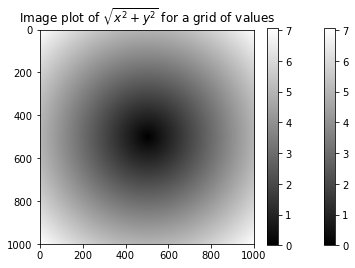

In [20]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()


#### 将条件逻辑表述为数组运算

In [21]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])

### 数学和统计方法

In [5]:
arr = np.random.randn(5,4) #正态分布
arr.mean()
arr

array([[-0.3762126 , -0.25016389, -0.27027327,  1.90776305],
       [ 1.29381093,  1.34027083,  1.220426  ,  1.27095996],
       [ 0.16425036, -0.13250079,  1.37901783, -1.09885799],
       [ 0.14113217, -0.1252049 , -1.48137767, -0.15084095],
       [-0.84832703, -2.21035875, -1.37198131,  1.648766  ]])

In [3]:
np.mean(arr)

0.25262179713893052

In [4]:
arr.sum()

5.0524359427786099

In [6]:
arr.sum(0)

array([ 0.37465383, -1.37795749, -0.52418842,  3.57779007])

In [7]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr.cumsum(0) #不聚合，产生中间结果组成数组

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)